In [2]:
%matplotlib notebook
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import scipy.signal
import datetime
from collections import Counter
from scipy.ndimage.filters import gaussian_filter,gaussian_filter1d
pd.set_option('display.max_rows', 1000)

def bold(obj):
    return fr"$\bf{{{obj}}}$"

<IPython.core.display.Javascript object>


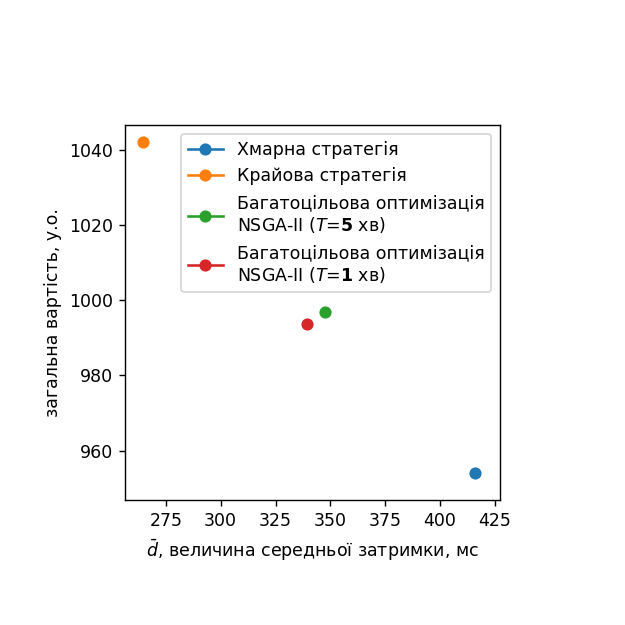

In [3]:
edge = {'delay': 264.561, 'cost': 1042.011, 'energy': 198257282.888, 'nw': 66859.855}
cloud = {'delay': 416.061, 'cost': 954.187, 'energy': 198265032.647, 'nw': 195498.189}
nsgaii = {'delay': 347.641, 'cost': 996.972, 'energy': 198257960.717, 'nw': 162562.466}
nsgaii2 = {'delay': 339.166, 'cost': 993.8, 'energy': 198256338.942, 'nw': 134043.265}

data = [edge, cloud, nsgaii, nsgaii2]

def limits(data, key, delta):
    avg = sum([item[key] for item in data]) / len(data)
    return avg * (1 - delta), avg * (1 + delta)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot([cloud['delay']], [cloud['cost']], label='Хмарна стратегія', marker='o')
ax.plot([edge['delay']], [edge['cost']], label='Крайова стратегія', marker='o')
ax.plot([nsgaii['delay']], [nsgaii['cost']], label=f'Багатоцільова оптимізація\nNSGA-II ($T$={bold(5)} хв)', marker='o')
ax.plot([nsgaii2['delay']], [nsgaii2['cost']], label=f'Багатоцільова оптимізація\nNSGA-II ($T$={bold(1)} хв)', marker='o')

ax.set_xlim(*limits(data, 'delay', 0.25))
ax.set_ylim(*limits(data, 'cost', 0.05))

ax.set_xlabel('$\\bar{d}$, величина середньої затримки, мс')
ax.set_ylabel('загальна вартість, у.о.')
ax.legend()
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)

<IPython.core.display.Javascript object>


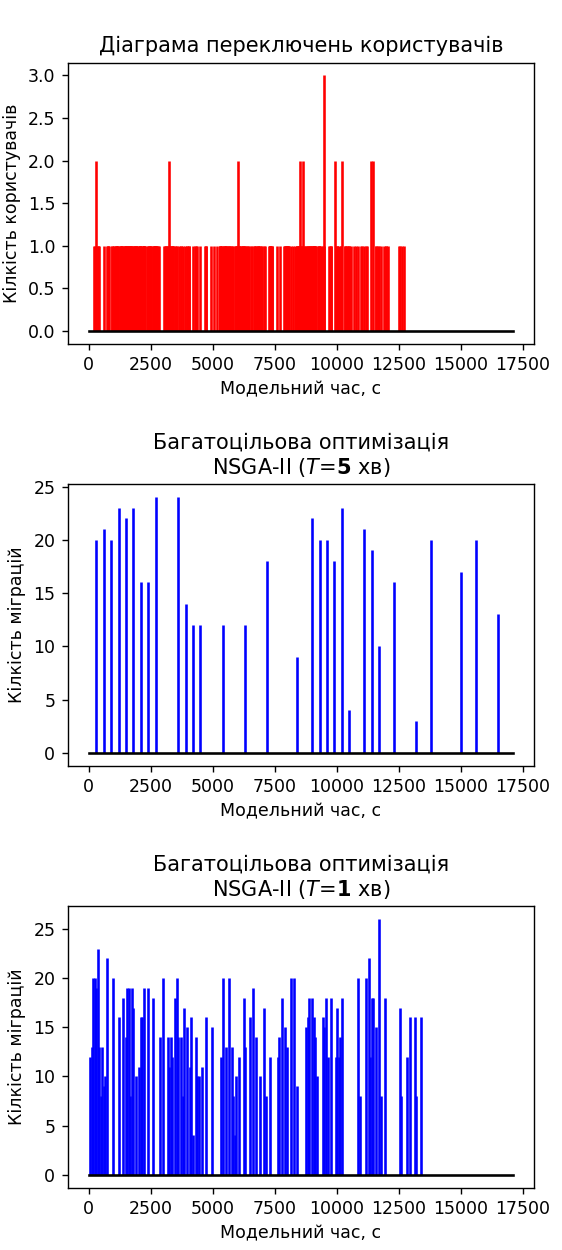

In [4]:
path = './results/experiment2_3'
dateformat = '%H:%M:%S'
all_data = {}
for fn in os.listdir(path):
    with open(os.path.join(path, fn), 'r') as f:
        migrations = f.read().splitlines()
        all_data[migrations[0]] = [(datetime.datetime.strptime(s[:8], dateformat) - datetime.datetime(1900, 1, 1, hour=3)).total_seconds() for s in migrations[1:]]
    
grouped = {}

for key, times in all_data.items():
    time, count = np.unique(times, return_counts=True)
    grouped[key] = (time, count)
    
total_plots = len(grouped)
fig, axs = plt.subplots(3, 1, figsize=(4.5, 10))
axs = axs.reshape(-1)
for i, (key, (times, counts)) in enumerate(grouped.items()):
    mod_type, pop_size, max_iter, delay, exec_time = key.split(', ')
    markerline, stemlines, baseline = axs[i].stem(np.hstack(([0], times[1:], [17100])), np.hstack(([0], counts[1:], [0])))
    baseline.set_color('black')
    colors = np.array([[0,0,1]] * (len(times) - 1))
    if int(mod_type) in [1, 2, 4, 5, 6] or exec_time == 'handoff':
        bs_events_times = grouped[f'{mod_type}, 100, 0, 0, handoff'][0][1:]
        bs_events_indices = np.isin(times[1:], bs_events_times)
        if int(mod_type) == 6:
            colors[bs_events_indices & (counts[1:] <= 3)] = [1,0,0]
        else:
            colors[bs_events_indices] = [1,0,0]
    colors = np.vstack(([[0,0,0]], colors, [[0,0,0]]))
    stemlines.set_color(colors)
    markerline.set_color('black')
    markerline.set_marker(None)
    if exec_time == 'handoff':
        axs[i].set_title(f'Діаграма переключень користувачів')
        axs[i].set_xlabel('Модельний час, с')
        axs[i].set_ylabel('Кілкість користувачів')
    else:
        axs[i].set_title(f'Багатоцільова оптимізація\nNSGA-II ($T$={bold(max_iter)} хв)')
        axs[i].set_xlabel('Модельний час, с')
        axs[i].set_ylabel('Кілкість міграцій')
        
fig.subplots_adjust(left=0.12, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.5)

In [5]:
[(item['nw'] / 8) / 1024 for item in data]

[8.161603393554687, 23.864525024414064, 19.844051025390623, 16.362703247070314]